<a href="https://colab.research.google.com/github/kishan038/Airline-Passenger-Referral-Prediction/blob/main/Kishan_Chauhan_Capstone_Project_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**   Airline Passenger Referral Prediction 


##### **Project Type**    - Classification
##### **Contribution**    - Individual


# **Project Summary -**

Airline Passenger Referral system has become the most important criteria globally for the airline industry in order to address the surge which has been created after global pandemic so as to ramain in the global market competition.Airline referral system generally works on customer reviews which is basically sentiment given by the customer depending upon various factor like seat comfort,their trip distance, route they hhave travelled, timing, the airline frequency, ground service etc. on the basis of which sentiment reviews and nachine learning model on calssification is prepared which helps airline industries to focus on the factor resolving which it can actually help them in business grwoth better than competitors.

The data shown includes airline reviews from 2006 to 2019 for a popular airlines around the world with multiple choice and free text questions.the main goal is to predict wheather travelers will refer to airline to your friends. i tested the data and did analysis to create machine learning models to predict the dependent factor which is the recommendation of airline by passenger to a friend.

# **GitHub Link -**

https://github.com/kishan038/Airline-Passenger-Referral-Prediction

# **Problem Statement**


The main objective is to predict wheather passengers will prefer the airline to their friends.

Data includes airline reviews from 2006 to 2019 for popular airlines around the world with multiple choice and free text questions.

Data is scrapped in spring 2019 

Airline Passenger Referral prediciton can help airlines to more effectively allocate their resources and improve their customer retention and acquistion efforts.  this can be especially useful for small and meduim sized airlines, a word of mouth referrals can be a key source of new customers.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.svm import SVC


### Dataset Loading

In [2]:
# Load Dataset
df=pd.read_excel("/content/drive/MyDrive/Capstone Project-3/data_airline_reviews.xlsx")

### Dataset First View

In [3]:
# Dataset First Look
df.head()

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Turkish Airlines,7.0,Christopher Hackley,8th May 2019,âœ… Trip Verified | London to Izmir via Istanb...,NaN,Business,Economy Class,London to Izmir via Istanbul,2019-05-01 00:00:00,4.0,5.0,4.0,4.0,2.0,4.0,yes
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Turkish Airlines,2.0,Adriana Pisoi,7th May 2019,âœ… Trip Verified | Istanbul to Bucharest. We ...,NaN,Family Leisure,Economy Class,Istanbul to Bucharest,2019-05-01 00:00:00,4.0,1.0,1.0,1.0,1.0,1.0,no
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Dataset Rows & Columns count

In [4]:
# Dataset Rows & Columns count
df.shape

(131895, 17)

### Dataset Information

In [5]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131895 entries, 0 to 131894
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airline          65947 non-null  object 
 1   overall          64017 non-null  float64
 2   author           65947 non-null  object 
 3   review_date      65947 non-null  object 
 4   customer_review  65947 non-null  object 
 5   aircraft         19718 non-null  object 
 6   traveller_type   39755 non-null  object 
 7   cabin            63303 non-null  object 
 8   route            39726 non-null  object 
 9   date_flown       39633 non-null  object 
 10  seat_comfort     60681 non-null  float64
 11  cabin_service    60715 non-null  float64
 12  food_bev         52608 non-null  float64
 13  entertainment    44193 non-null  float64
 14  ground_service   39358 non-null  float64
 15  value_for_money  63975 non-null  float64
 16  recommended      64440 non-null  object 
dtypes: float64

#### Duplicate Values

In [6]:
# Dataset Duplicate Value Count
len(df[df.duplicated()])

70711

In [7]:
df.shape

(131895, 17)

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.shape

(61184, 17)

#### Missing Values/Null Values

In [10]:
# Missing Values/Null Values Count
df.isnull().sum()

airline                1
overall             1783
author                 1
review_date            1
customer_review        1
aircraft           42696
traveller_type     23644
cabin               2479
route              23671
date_flown         23750
seat_comfort        4973
cabin_service       4944
food_bev           12843
entertainment      20954
ground_service     24015
value_for_money     1857
recommended         1423
dtype: int64

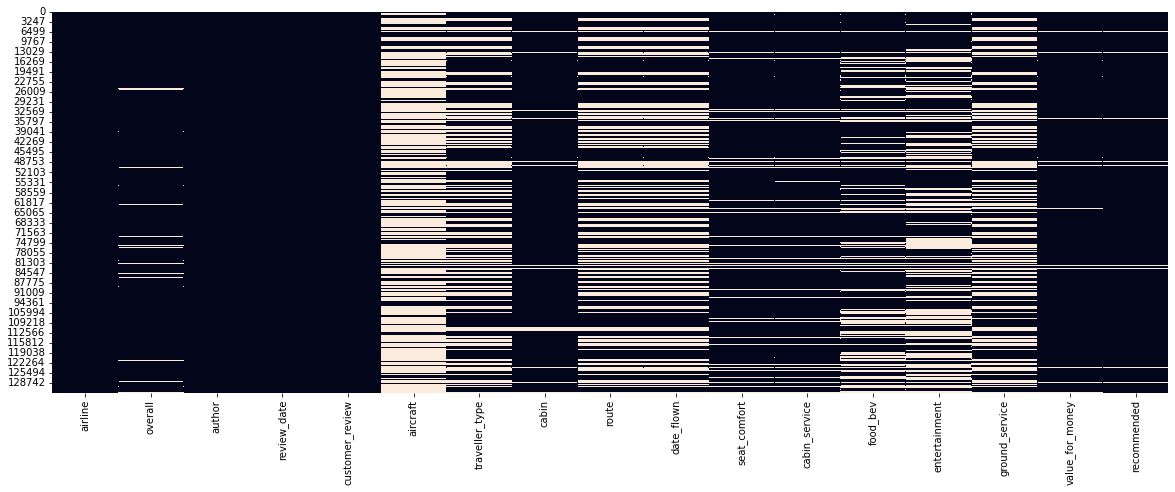

In [11]:
from matplotlib import figure
# Visualizing the missing values
plt.figure(figsize=(20,7))
sns.heatmap(df.isnull(),cbar=False)

### What did you know about your dataset?

Dataset has 131895 rows, 17 columns

There are lots of null values as well as duplicated values

Data includes airline reviews from 2006 to 2019

## ***2. Understanding Your Variables***

In [12]:
# Dataset Columns
df.columns

Index(['airline', 'overall', 'author', 'review_date', 'customer_review',
       'aircraft', 'traveller_type', 'cabin', 'route', 'date_flown',
       'seat_comfort', 'cabin_service', 'food_bev', 'entertainment',
       'ground_service', 'value_for_money', 'recommended'],
      dtype='object')

In [13]:
# Dataset Describe
df.describe(include="all")

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
count,61183,59401.000000,61183,61183,61183,18488,37540,58705,37513,37434,56211.000000,56240.000000,48341.000000,40230.000000,37169.000000,59327.000000,59761
unique,81,NaN,44069,3015,61172,2088,4,4,24549,63,NaN,NaN,NaN,NaN,NaN,NaN,2
top,Spirit Airlines,NaN,Anders Pedersen,19th January 2015,I flew from Chicago O'Hare to Dublin and from ...,A320,Solo Leisure,Economy Class,BKK to LHR,August 2015,NaN,NaN,NaN,NaN,NaN,NaN,no
freq,2871,NaN,93,198,2,2130,13935,45171,31,1127,NaN,NaN,NaN,NaN,NaN,NaN,31268
mean,NaN,5.164863,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.959278,3.200231,2.926956,2.887994,2.681347,2.950849,NaN
std,NaN,3.483701,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.436467,1.568429,1.483122,1.504452,1.613995,1.588433,NaN
min,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN
25%,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,NaN
50%,NaN,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,NaN
75%,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,5.000000,4.000000,4.000000,4.000000,4.000000,NaN


### Variables Description 



*   **airline**: Name of the airline

*   **overall**: Overall point is given to the trip between 1 to 10



*   **author**: Author of the trip

*   **review_date**: Date of the review: Review of the customers in free text format

*   **customer_review**: review of the customer 



*   **aircraft**: Type of the aircraft

*   **traveller_type**: Type of traveler(e.g. business, leisure)

*   **cabin**: Cabin at the flight date flown: Flight date


*   **route**: route of the airline

*   **date_flown**: date of traveling



*  **seat_comfort**: Rated between 1-5

*   **cabin_service**: Rated between 1-5


*   **foodbev**: Rated between 1-5 entainment: Rated between 1-5


*   **entainment**: Rated between 1-5



*   **ground_service**: Rated between 1-5


*   **value_formoney**: Rated between 1-5



*   **recommended**: target variable, binary(Yes/No)






### Check Unique Values for each variable.

In [14]:
# Check Unique Values for each variable.
df.nunique()

airline               81
overall               10
author             44069
review_date         3015
customer_review    61172
aircraft            2088
traveller_type         4
cabin                  4
route              24549
date_flown            63
seat_comfort           5
cabin_service          5
food_bev               5
entertainment          5
ground_service         5
value_for_money        5
recommended            2
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

Dropping rows which havee null values

In [15]:
#Dropping the rows which have null values
df.dropna(inplace=True)

Extracting date, month, year from date_flown feature

In [16]:
df["date_flown"].value_counts().head(10)


August 2015       437
December 2015     414
July 2015         409
January 2016      408
September 2015    402
November 2015     396
October 2015      383
June 2015         347
December 2016     330
February 2016     325
Name: date_flown, dtype: int64

In [17]:
#replacing yes=1 and no=0 in recommended column

df["recommended"].replace({"yes":1,"no":0},inplace=True)

In [18]:
df.isnull().sum()

airline            0
overall            0
author             0
review_date        0
customer_review    0
aircraft           0
traveller_type     0
cabin              0
route              0
date_flown         0
seat_comfort       0
cabin_service      0
food_bev           0
entertainment      0
ground_service     0
value_for_money    0
recommended        0
dtype: int64

### What all manipulations have you done and insights you found?

Dropped all the rows which contained missing values as we have sufficient training and testing dataset.

Performed label encoding on "recommended"(target variable)

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1  Boxplot on Airlines (Univariate)

In [19]:
# Chart - 1 visualization code
top20_airline=df["airline"].value_counts().head(20)


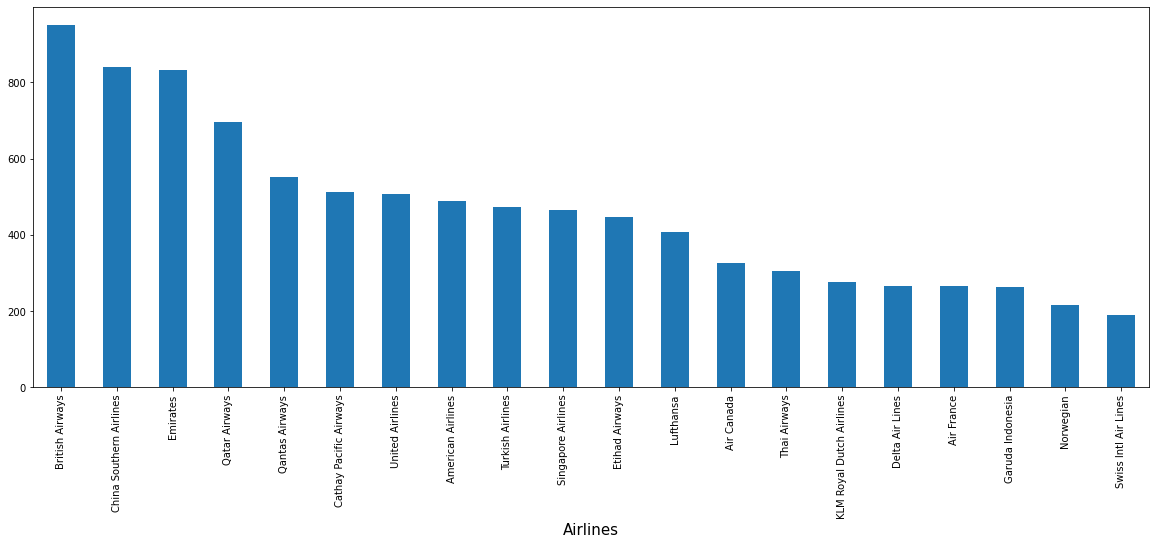

In [20]:
plt.figure(figsize=(20,7))
top20_airline.plot(kind="bar")
plt.xlabel("Airlines", fontsize=15)
plt.xticks(rotation=90)
plt.show()

##### 1. Why did you pick the specific chart?

Barplot is a univariate plot which is great to show different observations of single feature.

##### 2. What is/are the insight(s) found from the chart?

As we can see from above graph Btitish Airways preferred by most of people followed by China Sothern Airlines then Emirates while Swiss Intl Air lines has least flights among 20 airlines

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes it will create positive impact it helps to know where we need to focus most

#### Chart - 2 Count plot on Cabin 

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


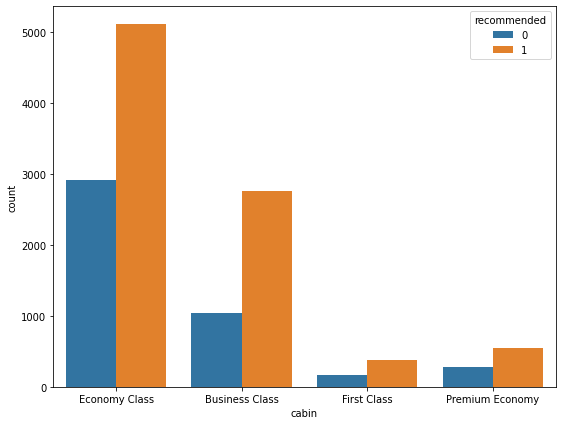

In [21]:
# Chart - 2 visualization code
plt.figure(figsize=(9,7))
sns.countplot(df["cabin"],hue=df["recommended"])
plt.show()

##### 1. Why did you pick the specific chart?

Count plot shows the counts of observations in each categorical bin using bars, countplot used for categorical instead of quantitative variable

##### 2. What is/are the insight(s) found from the chart?

As we can see from above graph most peopple used 
preferred economy class and also they recommend same followed by business class then Premuim economy and least is First Class.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes it will create positive impact it helps to know where we need to focus most 

#### Chart - 3 Pie chart on Cabin

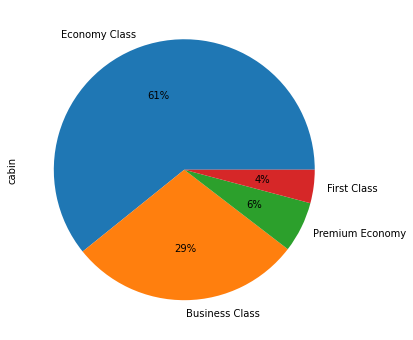

In [22]:
# Chart - 3 visualization code
df["cabin"].value_counts().plot(kind="pie",autopct="%1.0f%%",figsize=(6,6))

##### 1. Why did you pick the specific chart?

Pie chart helps organize and show data as percentage of whole, True to the name this kind ofvisulization uses a circle to represents the whole, and slices of that cirlce or pie to reprents the specific categories that compose the whole.

##### 2. What is/are the insight(s) found from the chart?

As we can see from above graph most peopple used 
preferred economy class(61%), followed by business class(29%) then Premuim economy(6%) and least is First Class(4%).

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes it will help to manage the business , it shows where we need to focus on most

#### Chart - 4- Area plot on traveller type

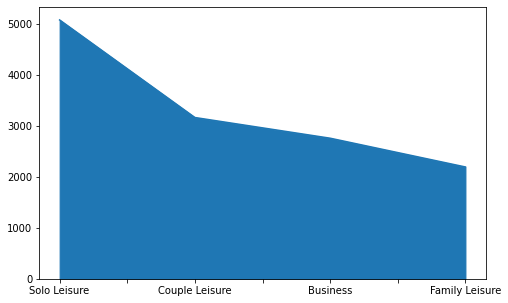

In [23]:
# Chart - 4 visualization code
plt.figure(figsize=(8,5))
df["traveller_type"].value_counts().plot(kind="area")

##### 1. Why did you pick the specific chart?

Area plot is Univariate which shows different obesrvations of single variable.

##### 2. What is/are the insight(s) found from the chart?

As we can see from above chart most people preferred Solo Leisure followed by couple Leisure then business and least is Family Leisure.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5 Countplot on overall ratings

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


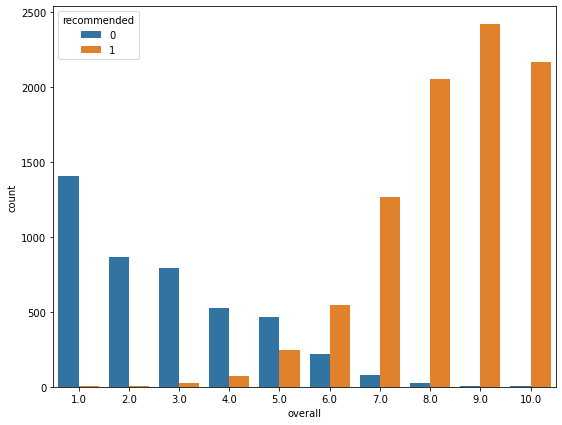

In [24]:
# Chart - 5 visualization code
plt.figure(figsize=(9,7))
sns.countplot(df["overall"],hue=df["recommended"])
plt.show()

##### 1. Why did you pick the specific chart?

Count plot shows the counts of observations in each categorical bin using bars, countplot used for categorical instead of quantitative variable

##### 2. What is/are the insight(s) found from the chart?

AS we can see from above graph those who rated 8,9,10 are most likely recommend to friend. also those who rated 6 and 7 probably recommend to friend.

And those who given below 5 are less likely to recommend to thier friend

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

As we can see conclude from the graph who rated more than 5 are more likely to recommend to their friend

#### Chart - 6 Line plot airlines vs seat_comfort

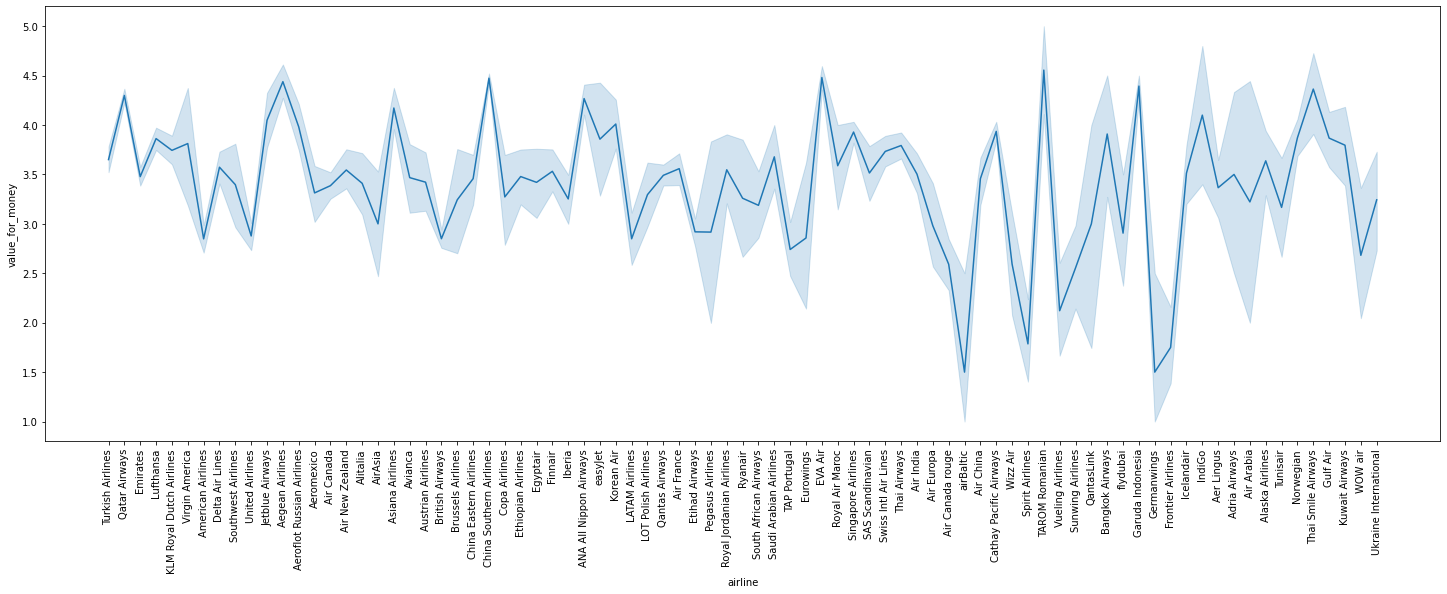

In [25]:
# Chart - 6 visualization code
plt.figure(figsize=(25,8))
sns.lineplot(x="airline",y=df["value_for_money"],data=df)
plt.xticks(rotation=90)
plt.show()

##### 1. Why did you pick the specific chart?

Line plot is good for analysis of two variables also

##### 2. What is/are the insight(s) found from the chart?

As we can see from above Tarom Romanian is most value for money airline.

Airbaltic is least value for money airline

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

From above analysis we can get which is most value for money airlines

#### Chart - 7 -Line plot on Aircraft type

In [26]:
# Chart - 7 visualization code
a=df["aircraft"].value_counts()[0:10]

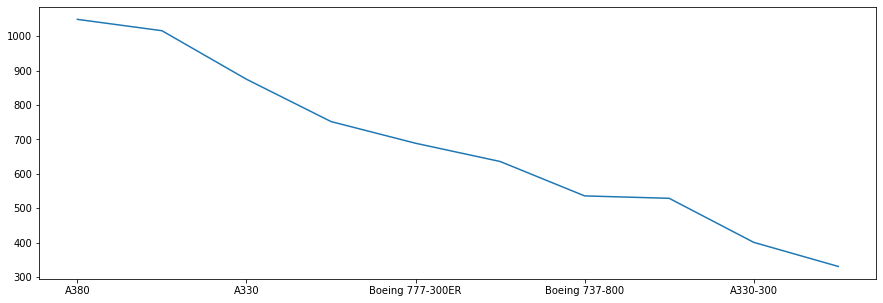

In [27]:
a.plot(kind="line",figsize=(15,5))

##### 1. Why did you pick the specific chart?

Line plot is used for univariate analysis which is great for single variable of multiple obervation

##### 2. What is/are the insight(s) found from the chart?

As we can see from above graph A380 aircraft used most number of times followed by A330 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8- Flights on date wise

In [28]:
# Chart - 8 visualization code
date=df["review_date"].apply(lambda x: x[0:4])
date.value_counts()

4th     477
15th    476
14th    459
28th    457
10th    452
20th    447
22nd    446
1st     445
18th    444
2nd     441
7th     441
13th    441
23rd    438
27th    437
21st    437
5th     435
6th     430
8th     424
12th    424
3rd     420
9th     417
24th    415
11th    413
19th    413
29th    408
26th    406
17th    405
30th    391
25th    385
16th    385
31st    280
Name: review_date, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


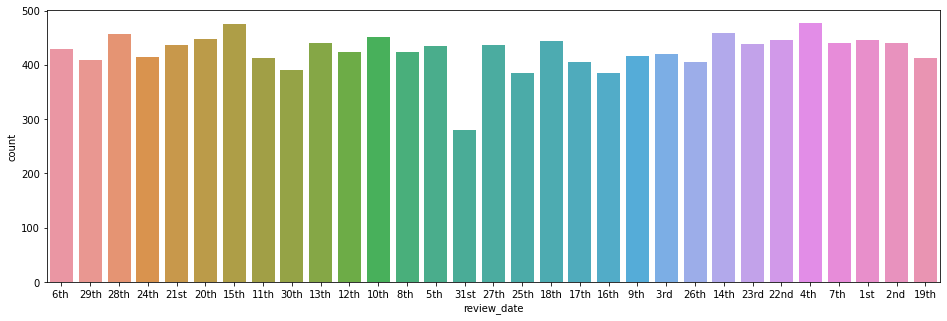

In [29]:
plt.figure(figsize=(16,5))
sns.countplot(date)

##### 1. Why did you pick the specific chart?

Count plot shows the counts of observations in each categorical bin using bars, countplot used for categorical instead of quantitative variable

##### 2. What is/are the insight(s) found from the chart?

As we can see from above graph most people travelled on date 4th while least people travelled on 31st

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9 Month wise flights

In [30]:
# Chart - 9 visualization code
month=df["date_flown"].value_counts().head(20)
month

August 2015       437
December 2015     414
July 2015         409
January 2016      408
September 2015    402
November 2015     396
October 2015      383
June 2015         347
December 2016     330
February 2016     325
March 2016        312
January 2017      299
August 2016       295
September 2016    295
July 2016         291
June 2016         291
April 2016        289
March 2017        287
October 2016      277
November 2016     269
Name: date_flown, dtype: int64

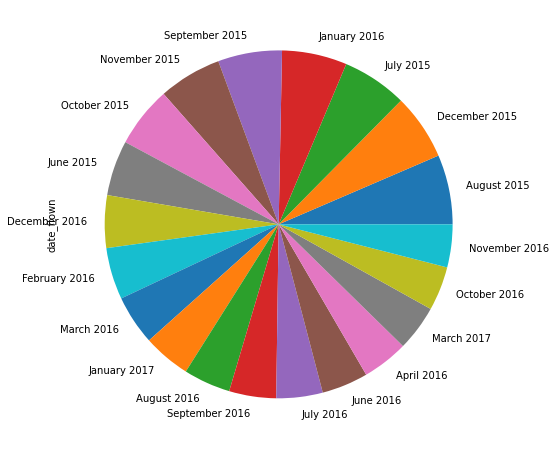

In [31]:
month.plot(kind="pie",figsize=(15,8))

##### 1. Why did you pick the specific chart?

Pie chart helps organize and show data as percentage of whole, True to the name this kind ofvisulization uses a circle to represents the whole, and slices of that cirlce or pie to reprents the specific categories that compose the whole.

##### 2. What is/are the insight(s) found from the chart?

As we can see from above pie graph most people travelled in August 2015

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [32]:
# Chart - 10 visualization code


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [33]:
# Chart - 11 visualization code


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [34]:
# Chart - 12 visualization code


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [35]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

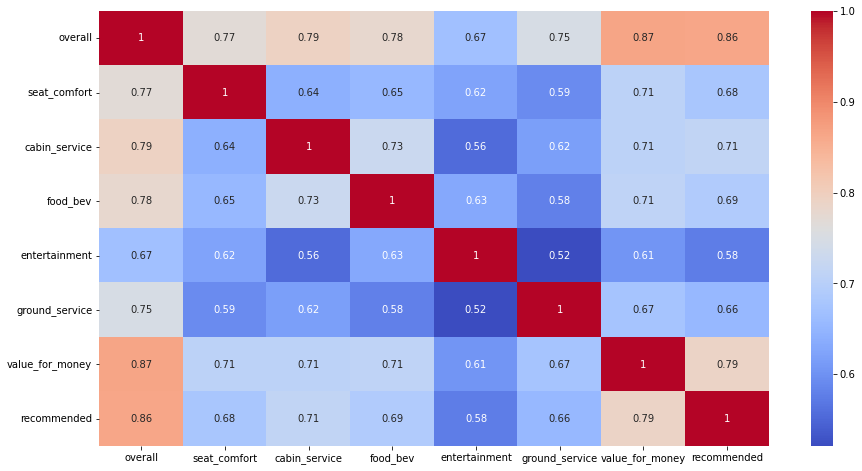

In [36]:
# Correlation Heatmap visualization code
plt.figure(figsize=(15,8))
correlation=df.corr()
sns.heatmap(abs(correlation),cmap="coolwarm",annot=True)

##### 1. Why did you pick the specific chart?

Correlation matrix is a table showing correlation coefficients between variables. each cell in the table shows the correlation between two variable, a correlation map used to summarize the data as input into more advanced analysis and dignostic for advanced analysis

##### 2. What is/are the insight(s) found from the chart?

As we can see from above heatmap "overall" and "value_for_money" is most important independent variable for recommended while "entertainment" is least important from above heatmap

#### Chart - 15 - Pair Plot 

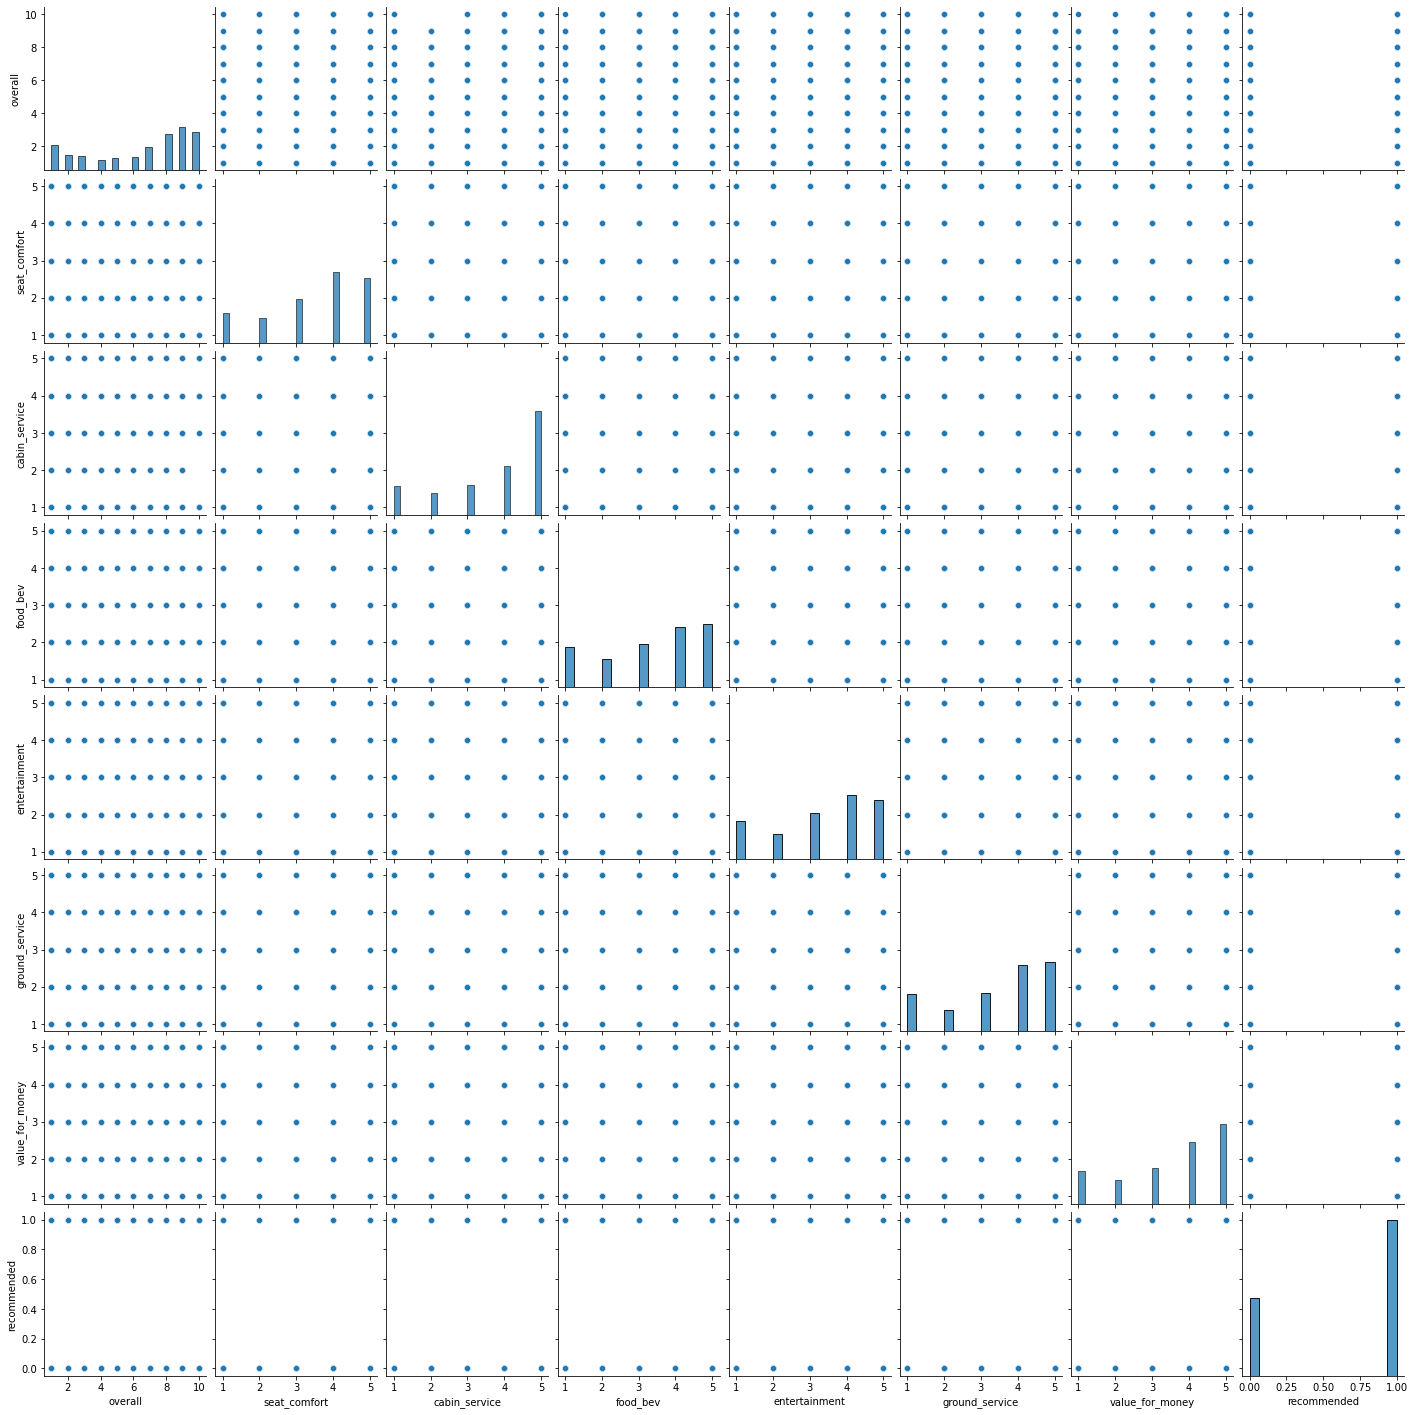

In [37]:
# Pair Plot visualization code
sns.pairplot(df)
plt.show()

##### 1. Why did you pick the specific chart?

Pairplpot is used to understand set features to explain relationship between two variables or to form the most separated clusters, it is also helps to form some simple classification models by drawing some simple line or make linear separation in our data-set.
I used pairplot to analyse the patterns of data and relationship between features, its exactly same as coorealtion map but here you will get graphical representation

##### 2. What is/are the insight(s) found from the chart?

As we can see from above heatmap "overall" and "value_for_money" is most important independent variable for recommended while "entertainment" is least important

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [38]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [39]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [40]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [41]:
# Handling Missing Values & Missing Value Imputation

#Dropping the rows which have null values

df.dropna(inplace=True)

#### What all missing value imputation techniques have you used and why did you use those techniques?

there were lot of missing values in dtaset, As we have enough data for training and testing, so better i dropped the rows which containing missing values

### 2. Handling Outliers

Text(0, 0.5, 'rating')

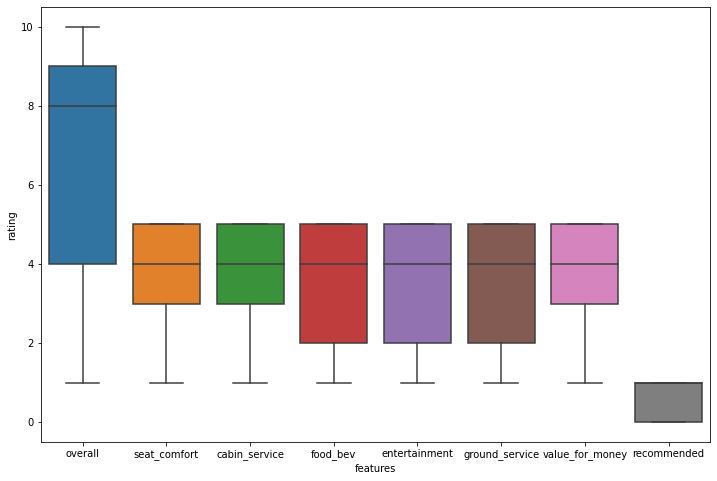

In [42]:
# Handling Outliers & Outlier treatments
plt.figure(figsize=(12,8))
sns.boxplot(data=df)
plt.xlabel("features")
plt.ylabel("rating")

##### What all outlier treatment techniques have you used and why did you use those techniques?

Boxplot is used for outlier detection

Outliers are not present in the data

median of Overall is 5, The median of other features are approximately 3

### 3. Categorical Encoding

In [43]:
# Encode your categorical columns

#replacing yes=1 and no=0 in recommended column

df["recommended"].replace({"yes":1,"no":0},inplace=True)

In [44]:
#one hot encoding on categorrical features
categorical_columns=["airline","cabin"]

In [45]:
df2=pd.get_dummies(df,columns=categorical_columns,drop_first=False)
df2.dropna(inplace=True)

#### What all categorical encoding techniques have you used & why did you use those techniques?

Label encoding performed on "recommended" as it has bianry values

One hot encoding performed on "airline" and "cabin"

In [46]:
df2.columns

Index(['overall', 'author', 'review_date', 'customer_review', 'aircraft',
       'traveller_type', 'route', 'date_flown', 'seat_comfort',
       'cabin_service', 'food_bev', 'entertainment', 'ground_service',
       'value_for_money', 'recommended', 'airline_ANA All Nippon Airways',
       'airline_Adria Airways', 'airline_Aegean Airlines',
       'airline_Aer Lingus', 'airline_Aeroflot Russian Airlines',
       'airline_Aeromexico', 'airline_Air Arabia', 'airline_Air Canada',
       'airline_Air Canada rouge', 'airline_Air China', 'airline_Air Europa',
       'airline_Air France', 'airline_Air India', 'airline_Air New Zealand',
       'airline_AirAsia', 'airline_Alaska Airlines', 'airline_Alitalia',
       'airline_American Airlines', 'airline_Asiana Airlines',
       'airline_Austrian Airlines', 'airline_Avianca',
       'airline_Bangkok Airways', 'airline_British Airways',
       'airline_Brussels Airlines', 'airline_Cathay Pacific Airways',
       'airline_China Eastern Airlines', 

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [47]:
# Expand Contraction

#### 2. Lower Casing

In [48]:
# Lower Casing

#### 3. Removing Punctuations

In [49]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [50]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [51]:
# Remove Stopwords

In [52]:
# Remove White spaces

#### 6. Rephrase Text

In [53]:
# Rephrase Text

#### 7. Tokenization

In [54]:
# Tokenization

#### 8. Text Normalization

In [55]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [56]:
# POS Taging

#### 10. Text Vectorization

In [57]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [58]:
# Manipulate Features to minimize feature correlation and create new features

#crating new data frame df2

df2=pd.get_dummies(df,columns=categorical_columns,drop_first=False)

#### 2. Feature Selection

In [59]:
# Select your features wisely to avoid overfitting


In [60]:
#dropping some unecessary columns and dependent variable
df2.drop(columns={"author","review_date","customer_review","aircraft","traveller_type","route","date_flown","recommended"},inplace=True)

Independent Variable

In [61]:
depen_var= df2


In [62]:
depen_var.isnull()

,overall,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,airline_ANA All Nippon Airways,airline_Adria Airways,airline_Aegean Airlines,...,airline_Vueling Airlines,airline_WOW air,airline_Wizz Air,airline_airBaltic,airline_easyJet,airline_flydubai,cabin_Business Class,cabin_Economy Class,cabin_First Class,cabin_Premium Economy
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
15,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
17,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
19,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131676,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
131680,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
131696,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
131702,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Dependent Variable

In [63]:
y=df["recommended"]
y

7         1
15        0
17        1
19        0
29        0
         ..
131676    1
131680    1
131696    0
131702    1
131712    0
Name: recommended, Length: 13189, dtype: int64

##### What all feature selection methods have you used  and why?

Created new data frame df2 , and applied one hot encoding on categorical columns

##### Which all features you found important and why?

"overall" and "value_for_money" is most important independent variable for recommended while "entertainment" is least important

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [64]:
# Transform Your data

### 6. Data Scaling

In [65]:
# Scaling your data
from sklearn.preprocessing import MinMaxScaler
feature_scaler=MinMaxScaler()

In [66]:
X=feature_scaler.fit_transform(depen_var)
X

array([[1.        , 0.75      , 1.        , ..., 1.        , 0.        ,
        0.        ],
       [0.11111111, 0.5       , 0.5       , ..., 1.        , 0.        ,
        0.        ],
       [0.55555556, 0.25      , 0.5       , ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [1.        , 1.        , 1.        , ..., 1.        , 0.        ,
        0.        ],
       [0.44444444, 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ]])

##### Which method have you used to scale you data and why?

MinMaxScaler used for data scaling

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [67]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [68]:
# Split your data to train and test. Choose Splitting ratio wisely.
from sklearn.model_selection import train_test_split

In [69]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [70]:
#checking shape of the training and testing set
X_train.shape, X_test.shape

((10551, 92), (2638, 92))

##### What data splitting ratio have you used and why? 

80:20 ratio taken for testing and training dataset, as we have enough data so we can chose above ratio

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Data balancing is not required as data is well distributed in below plot

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


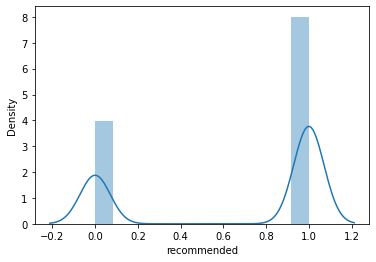

In [71]:
# Handling Imbalanced Dataset (If needed)
sns.distplot(df["recommended"])
plt.show()

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Dsitribution plot used for checking distrubution of the target variable.

Data is well distributed no need to balance

## ***7. ML Model Implementation***

### ML Model - 1- Logistic Regression

In [72]:
# ML Model - 1 Implementation
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()
# Fit the Algorithm
clf.fit(X_train,y_train)


LogisticRegression()

In [73]:
# Predict on the model (training)
trn=clf.predict(X_train)

In [74]:
# Predict on the model (testing)
tst=clf.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [75]:
# Visualizing evaluation Metric Score chart


In [76]:
from sklearn.metrics import accuracy_score
#accuracy score on training datset
accuracy_score(trn,y_train)


0.9522320159226614

In [77]:
#accuracy score on test dataset
accuracy_score(y_test,tst)


0.9401061410159212

#### 2. Cross- Validation & Hyperparameter Tuning

In [78]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2 Fitting Decision Tree Classifier

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [79]:
# Visualizing evaluation Metric Score chart


In [80]:
from sklearn.tree import DecisionTreeClassifier

In [81]:
tree_classify=DecisionTreeClassifier()

In [82]:
#fitting decision tree
tree_classify.fit(X_train,y_train)

DecisionTreeClassifier()

In [83]:
#performance score on training datset
tree_classify.score(X_train,y_train)

0.9992417780305184

In [84]:
#performance score on training datset
tree_classify.score(X_test,y_test)

0.9298711144806672

In [85]:
# Predict on the model (testing)
y_pred=tree_classify.predict(X_test)

In [86]:
from sklearn.metrics import classification_report
report_dt=classification_report(y_test,y_pred)
print(report_dt)

              precision    recall  f1-score   support

           0       0.90      0.89      0.89       859
           1       0.95      0.95      0.95      1779

    accuracy                           0.93      2638
   macro avg       0.92      0.92      0.92      2638
weighted avg       0.93      0.93      0.93      2638



#### 2. Cross- Validation & Hyperparameter Tuning

In [87]:
#defining parameters

#parameters= {"criterion":["gini","entropy"],"max_depth":[5],"min_samples_split":[5,7],"min_sample_leaf":[2,3]}
parameters= {"criterion":["gini","entropy"],"max_depth":[5]}
scoring_=["f1","recall","precision","accuracy"]

In [88]:
from sklearn.model_selection import GridSearchCV
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
tree_cv=GridSearchCV(estimator=tree_classify, param_grid=parameters, scoring=scoring_,cv=5,refit="accuracy")


In [89]:
# Fit the Algorithm
tree_cv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [5]},
             refit='accuracy',
             scoring=['f1', 'recall', 'precision', 'accuracy'])

In [90]:
# Predict on the model
y_pred=tree_cv.predict(X_test)

In [91]:
#classification report
report=classification_report(y_test,y_pred)

In [92]:
print(report)

              precision    recall  f1-score   support

           0       0.92      0.89      0.90       859
           1       0.95      0.96      0.95      1779

    accuracy                           0.94      2638
   macro avg       0.93      0.93      0.93      2638
weighted avg       0.94      0.94      0.94      2638



In [93]:
from sklearn.metrics._plot.confusion_matrix import confusion_matrix
#confusion matrix
confuse_matrix=confusion_matrix(y_test,y_pred)

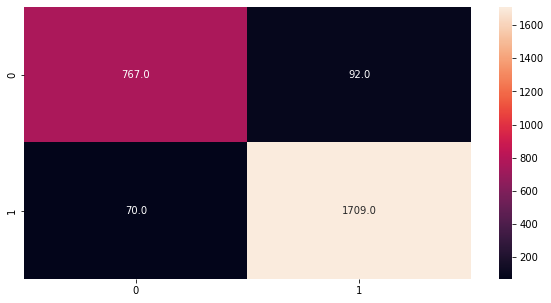

In [94]:
plt.figure(figsize=(10,5))
sns.heatmap(confuse_matrix,annot=True, fmt=".1f")

In [95]:
#checking the best parameters
tree_cv.best_params_

{'criterion': 'entropy', 'max_depth': 5}

In [96]:
#checking score on training datset
tree_cv.score(X_train,y_train)

0.9540327931001801

In [97]:
#score on testing dataset
tree_cv.score(X_test,y_test)

0.9385898407884761

##### Which hyperparameter optimization technique have you used and why?

GridSearchCV which uses the grid search technique for finding the optimal hyperparameters to increase the model performance, our goal should find out the best hyperparameter values to get the perfect prediciton from the model.


GridSearchCV uses the different combination of all specified hyperparameters and their values to calculate the formance for each combination and select the best values for the parameters.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Decision tree classifier overfitted but after applying hyperparameter tuning model performed well on both testing dataset as well as on training dataset

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3 Suppoprt Vector Machine

In [98]:
# ML Model - 3 Implementation
from sklearn.svm import SVC

sv=SVC()
# Fit the Algorithm
sv.fit(X_train,y_train)
# Predict on the model

SVC()

In [99]:
#checking trainig score
sv.score(X_train, y_train)

0.956876125485736

In [100]:
#checking testing score
sv.score(X_test,y_test)

0.9382107657316149

In [101]:
pred_value=sv.predict(X_test)

In [102]:
print(classification_report(y_test,pred_value))

              precision    recall  f1-score   support

           0       0.91      0.90      0.90       859
           1       0.95      0.96      0.95      1779

    accuracy                           0.94      2638
   macro avg       0.93      0.93      0.93      2638
weighted avg       0.94      0.94      0.94      2638



#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [103]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [104]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

GridSearchCV uses the different combination of all specified hyperparameters and their values to calculate the formance for each combination and select the best values for the parameters.

GridSearchCV which uses the grid search technique for finding the optimal hyperparameters to increase the model performance, our goal should find out the best hyperparameter values to get the perfect prediciton from the model.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Decision tree classifier overfitted but after applying hyperparameter tuning model performed well on both testing dataset as well as on training dataset

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

accuracy acore and confusion matrix used to measure the performance of the model

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Decison tree with tuned hyperparameter performed well, i prefer Decision tree classifier with hyperparameter tuning

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

# **How Airline Passenger Referral Prediction can help stakeholders**

***Airline Passenger referral prediciton can help stakeholders in number of ways, for example if airline able to accurately predict which passengers are likely to refer other their airline, they can target their marketing efforts towards those individuals in order to generate more refferals, this can be especially useful for small and meduim sized airlines, a word of mouth referrals can be a key source of new customers. ***

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [105]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [106]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

From EDA, i have discovered that A320 is the most commonly used aircraft, 61% passenger preferred economy class.

Talking about airlines Bristish airways was preferred most of the times followed by China southern airlines

Most peopple used preferred economy class and also they recommend same followed by business class then Premuim economy and least is First Class also most people preferred Solo Leisure followed by couple Leisure then business and least is Family Leisure.

Tarom Romanian is most value for money airline, while Airbaltic is least value for money airline

The most important feature are overall rating and value for money that contribute to a model's prediction wheather a passenger will recommended a particular airline to his/her friends.



Models used for classification problems are:
1. Logistic Regression
2. Decision Tree with hyperparameter tuning
3. Support Vector 

from above model logistic regression performed well. 
Decision tree model overfitted but hyperparameter tuning it did well
Out of all these support vector lassifier performed best of all



### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***